# A robust-contrast trainable ConvNet layer for image classification using  quaternion monogenic function
## Boxplots

*Contrast TF*

---
## Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Open Data

In [2]:
dataset_names = [
        'cats_vs_dogs_results.csv',
        'cifar10_results.csv',
        'fashion_mnist_results.csv',
        'mnist_results.csv']
paths = ['contrast_tensorflow/', 'q9_tf']
con = '$C_{TF}$'

In [3]:
b = []
for names in dataset_names:
    for pth in paths:
        df_ = pd.read_csv('{}/{}'.format(pth, names), usecols=['Model', 'Level', 'Test', 'Test_acc'])
        b.append(df_)
df = pd.concat(b)
print(df.shape)


(480, 4)


## Clean data

In [4]:
df[['dataset','train_level', 'Train1']] = df.Model.str.split("-",expand=True,)
df[['Train', 'temp']] = df.Train1.str.split(".",expand=True,)
df.drop('Model', axis='columns', inplace=True)
df.drop('temp', axis='columns', inplace=True)
df.drop('Train1', axis='columns', inplace=True)

df['train_level']  = df.train_level.replace('100', '$d_0$')
df['train_level']  = df.train_level.replace('10', '$d_3$')
df['train_level']  = df.train_level.replace('30', '$d_1$')
df['train_level']  = df.train_level.replace('70', '$d_2$')
df['dataset']  = df.dataset.replace('cats_vs_dogs', 'DvsC')
df['dataset']  = df.dataset.replace('cifar10', 'CIFAR-10')
df['dataset']  = df.dataset.replace('mnist', 'MNIST')
df['dataset']  = df.dataset.replace('fashion_mnist', 'fashion MNIST')

df.head()

Level  Test  Test_acc dataset train_level Train
0    1.0   A1C  0.592433    DvsC       $d_3$   A1C
1    1.0   A1C  0.673545    DvsC       $d_0$   A1C
2    1.0   A1C  0.607337    DvsC       $d_1$   A1C
3    1.0   A1C  0.656349    DvsC       $d_2$   A1C
4    1.0  A1M6  0.658928    DvsC       $d_3$  A1M6

## Maximum test accuracy values

In [5]:
models = ['A1', 'A2', 'A3']
dat = df.dataset.unique()
lev = df.train_level.unique()
out = []
r2 = []
header =df.columns
for m in models:
    #print(m)
    for d in dat:
        #get the test acc values by model and dataset
        tmp0 = df.loc[(df.Test.str.contains(m)) & (df['dataset'] == d) &  (df.train_level.str.contains('d'))]
        # get the maximum test acc from all models (C, Q9, and M6)
        tmp1 = tmp0[tmp0.Test_acc == tmp0.Test_acc.max()]
        #add dval colum  (square difference)
        tmp0['dval'] = (tmp0.Test_acc - tmp0.Test_acc.max())**2 
        header2 =tmp0.columns
        #Create new list with the most important information
        for index, rows in tmp0.iterrows():
            my_list0 =[rows.Level, rows.Test, rows.Test_acc, rows.dataset,rows.train_level, rows.Train, rows.dval]
            r2.append(my_list0)
        for index, rows in tmp1.iterrows():
            my_list =[rows.Level, rows.Test, rows.Test_acc, rows.dataset,rows.train_level, rows.Train]
            out.append(my_list)
         #   print(tmp1)
df_out = pd.DataFrame(out, columns=header) #Maximum values
df_r2 = pd.DataFrame(r2, columns=header2)  #r square difference

/home/umoya/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


### Number of maximum values for each dataset and model

    Level  Test  Test_acc        dataset train_level Train
0     1.0   A1C  0.673545           DvsC       $d_0$   A1C
1     1.0   A1C  0.544500       CIFAR-10       $d_0$   A1C
2     0.1  A1Q9  0.901571  fashion MNIST       $d_3$  A1Q9
4     0.1  A1Q9  0.986143          MNIST       $d_3$  A1Q9
6     0.7  A2M6  0.715964           DvsC       $d_0$  A2M6
7     1.0   A2C  0.553700       CIFAR-10       $d_0$   A2C
8     1.0   A2C  0.901500  fashion MNIST       $d_0$   A2C
9     0.3   A2C  0.989100          MNIST       $d_1$   A2C
10    1.0   A3C  0.848094           DvsC       $d_0$   A3C
11    0.3  A3M6  0.624200       CIFAR-10       $d_1$  A3M6


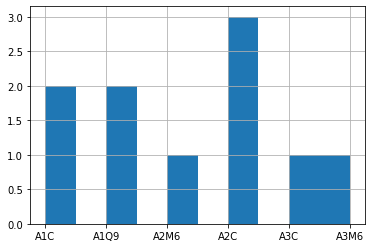

In [6]:
sds = df_out.drop_duplicates(subset='Test_acc', keep="last")
print(sds)
sds.Test.hist()
plt.show()

### Get the  values for each dash-line (maximum values)

In [7]:
A1blue = df_out[(df_out.Test.str.contains('A1')) & (df_out['dataset'] == 'MNIST')].Test_acc.unique()
A1orange = df_out[(df_out.Test.str.contains('A1')) & (df_out['dataset'] == 'fashion MNIST')].Test_acc.unique()
A1green = df_out[(df_out.Test.str.contains('A1')) & (df_out['dataset'] == 'CIFAR-10')].Test_acc.unique()
A1red = df_out[(df_out.Test.str.contains('A1')) & (df_out['dataset'] == 'DvsC')].Test_acc.unique()

A2blue = df_out[(df_out.Test.str.contains('A2')) & (df_out['dataset'] == 'MNIST')].Test_acc.unique()
A2orange = df_out[(df_out.Test.str.contains('A2')) & (df_out['dataset'] == 'fashion MNIST')].Test_acc.unique()
A2green = df_out[(df_out.Test.str.contains('A2')) & (df_out['dataset'] == 'CIFAR-10')].Test_acc.unique()
A2red = df_out[(df_out.Test.str.contains('A2')) & (df_out['dataset'] == 'DvsC')].Test_acc.unique()

A3green = df_out[(df_out.Test.str.contains('A3')) & (df_out['dataset'] == 'CIFAR-10')].Test_acc.unique()
A3red = df_out[(df_out.Test.str.contains('A3')) & (df_out['dataset'] == 'DvsC')].Test_acc.unique()


### Compute the sum of the square differences of the maximum

In [8]:

ac = df_r2.loc[(df_r2.Test.str.contains('C'))]['dval'].sum()
am6 = df_r2.loc[(df_r2.Test.str.contains('M6'))]['dval'].sum()
aq9 = df_r2.loc[(df_r2.Test.str.contains('Q9'))]['dval'].sum()
print(" Sum of squares differences C", ac,'\n Sum of squares differences M6',am6,' \n Sum of squares differences Q9', aq9)

 Sum of squares differences C 7.758125796387281 
 Sum of squares differences M6 0.5151766979673111  
 Sum of squares differences Q9 1.725865751010897


---
## Display values in a Table

In [9]:
df =  df.rename(columns={'Train': 'Model', 'train_level': 'Degradation in trained model'})

In [10]:
df.groupby(['Model', 'dataset']).Test_acc.describe()

count      mean       std       min       25%       50%  \
Model dataset                                                                  
A1C   CIFAR-10        16.0  0.362544  0.134985  0.153500  0.260050  0.373900   
      DvsC            16.0  0.608090  0.045960  0.519347  0.592218  0.604185   
      MNIST           16.0  0.884269  0.244117  0.180900  0.961225  0.980100   
      fashion MNIST   16.0  0.753462  0.207901  0.211200  0.755725  0.845100   
A1M6  CIFAR-10        16.0  0.489256  0.008349  0.478300  0.481825  0.489950   
      DvsC            16.0  0.650079  0.008367  0.640585  0.642161  0.649470   
      MNIST           16.0  0.961325  0.021636  0.903500  0.954675  0.966950   
      fashion MNIST   16.0  0.823275  0.067413  0.705700  0.790000  0.839650   
A1Q9  CIFAR-10        16.0  0.429604  0.038830  0.332333  0.405458  0.444333   
      DvsC            16.0  0.638671  0.012850  0.607649  0.632789  0.642243   
      MNIST           16.0  0.979750  0.007432  0.957571  0.980000  0.982214   
      fashion MNIST   16.0  0.855223  0.055332  0.704857  0.840464  0.872286   
A2C   CIFAR-10        16.0  0.390600  0.136015  0.156600  0.299925  0.406600   
      DvsC            16.0  0.615201  0.074423  0.494984  0.552594  0.619805   
      MNIST           16.0  0.939600  0.132138  0.475600  0.982125  0.986250   
      fashion MNIST   16.0  0.755637  0.262934  0.100000  0.816125  0.874950   
A2M6  CIFAR-10        16.0  0.471406  0.018149  0.439600  0.461750  0.476450   
      DvsC            16.0  0.670787  0.027257  0.650043  0.650831  0.658785   
      MNIST           16.0  0.985475  0.001840  0.981100  0.984625  0.985900   
      fashion MNIST   16.0  0.881238  0.004638  0.873700  0.878825  0.881600   
A2Q9  CIFAR-10        16.0  0.452719  0.037231  0.344833  0.444667  0.470750   
      DvsC            16.0  0.611195  0.021349  0.549205  0.606897  0.612591   
      MNIST           16.0  0.979652  0.007543  0.957000  0.978357  0.982071   
      fashion MNIST   16.0  0.845312  0.055417  0.717286  0.810214  0.864857   
A3C   CIFAR-10        16.0  0.381812  0.194215  0.112300  0.223475  0.357800   
      DvsC            16.0  0.682717  0.122464  0.494411  0.570364  0.699627   
A3M6  CIFAR-10        16.0  0.613319  0.010902  0.589700  0.607425  0.616850   
      DvsC            16.0  0.767913  0.010068  0.750645  0.761250  0.771568   
A3Q9  CIFAR-10        16.0  0.455802  0.055150  0.300000  0.429083  0.481000   
      DvsC            16.0  0.688279  0.031668  0.597765  0.679308  0.697035   

                          75%       max  
Model dataset                            
A1C   CIFAR-10       0.495475  0.544500  
      DvsC           0.653124  0.673545  
      MNIST          0.984075  0.985300  
      fashion MNIST  0.886800  0.897800  
A1M6  CIFAR-10       0.496050  0.500600  
      DvsC           0.658068  0.660361  
      MNIST          0.975875  0.981400  
      fashion MNIST  0.882025  0.890300  
A1Q9  CIFAR-10       0.458750  0.471500  
      DvsC           0.644929  0.656210  
      MNIST          0.983786  0.986143  
      fashion MNIST  0.897500  0.901571  
A2C   CIFAR-10       0.510550  0.553700  
      DvsC           0.689596  0.710519  
      MNIST          0.987900  0.989100  
      fashion MNIST  0.891625  0.901500  
A2M6  CIFAR-10       0.486925  0.490000  
      DvsC           0.678919  0.715964  
      MNIST          0.986950  0.987800  
      fashion MNIST  0.883450  0.889700  
A2Q9  CIFAR-10       0.477583  0.482333  
      DvsC           0.623657  0.636872  
      MNIST          0.983571  0.986714  
      fashion MNIST  0.888250  0.895714  
A3C   CIFAR-10       0.590325  0.622400  
      DvsC           0.781528  0.848094  
A3M6  CIFAR-10       0.621100  0.624200  
      DvsC           0.775724  0.779306  
A3Q9  CIFAR-10       0.492542  0.502833  
      DvsC           0.710249  0.718092

## Display the main grid of boxen plots

<Figure size 864x576 with 0 Axes>

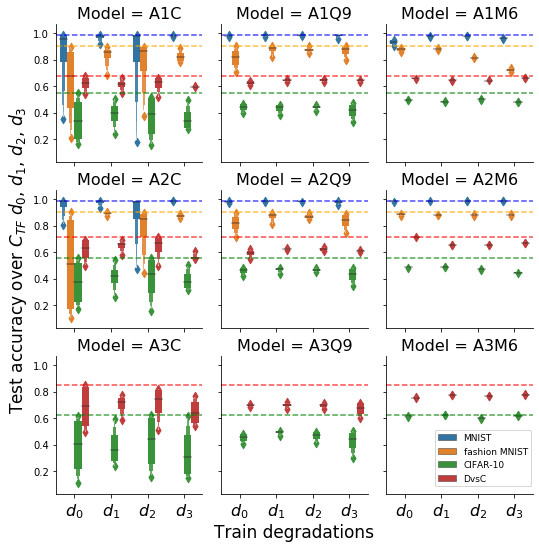

In [11]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

grid = sns.catplot(x='Degradation in trained model', 
            y='Test_acc', hue='dataset', data=df, 
            col="Model", kind="boxen", 
            height=2.5, aspect=1, col_wrap=3,
            order=['$d_0$','$d_1$','$d_2$','$d_3$'], 
            hue_order=['MNIST', 'fashion MNIST','CIFAR-10','DvsC'], legend = False, 
            col_order =['A1C','A1Q9','A1M6', 'A2C', 'A2Q9','A2M6','A3C','A3Q9','A3M6'], linewidth=1   )

grid.set_xticklabels(fontsize = 16)
grid.set_titles(size=16)
grid.set_ylabels('',fontsize = 14)
grid.set_xlabels('',  fontsize = 14)


grid.axes[7].set_xlabel('Train degradations', fontsize = 17)
grid.axes[3].set_ylabel('Test accuracy over {} $d_0$, $d_1$, $d_2$, $d_3$'.format(con), fontsize = 17)

#Dash lines for the maximum
for i in range(0,3):
    grid.axes[i].axhline(A1blue, ls='--', c='blue', alpha=.7)
    grid.axes[i].axhline(A1orange, ls='--', c='orange', alpha=.7)
    grid.axes[i].axhline(A1red, ls='--', c='red', alpha=.7)
    grid.axes[i].axhline(A1green, ls='--', c='green', alpha=.7)

for i in range(3,6):
    grid.axes[i].axhline(A2blue, ls='--', c='blue', alpha=.7)
    grid.axes[i].axhline(A2orange, ls='--', c='orange', alpha=.7)
    grid.axes[i].axhline(A2red, ls='--', c='red', alpha=.7)
    grid.axes[i].axhline(A2green, ls='--', c='green', alpha=.7)


for i in range(6,9):
    grid.axes[i].axhline(A3red, ls='--', c='red', alpha=.7)
    grid.axes[i].axhline(A3green, ls='--', c='green', alpha=.7)
    
#fig.tight_layout() 
plt.legend(bbox_to_anchor=(0.3, 0.5, .72, 0), loc="upper left", mode="expand", ncol=1, fontsize=9)
#plt.savefig('c_s3_3.eps', format='eps', dpi=300)
plt.show()